<a href="https://colab.research.google.com/github/SreehariTRajesh/Machine-Learning/blob/main/DeepLearning/CNN/CNN_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Convolutional Neural Networks**

In [1]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 29.2 MB/s 
  Attempting uninstall: tensorflow-datasets
    Found existing installation: tensorflow-datasets 4.6.0
    Uninstalling tensorflow-datasets-4.6.0:
      Successfully uninstalled tensorflow-datasets-4.6.0


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
tfds.disable_progress_bar()
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import logging
logger=tf.get_logger()
logger.setLevel(logging.ERROR)

In [5]:
dataset,metadata=tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset=dataset['train'],dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [7]:
num_train_examples=metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


In [8]:
def normalize(images,labels):
    images=tf.cast(images,tf.float32)
    images/=255
    return images,labels

train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)

In [9]:
train_dataset.cache()

<CacheDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [10]:
train_dataset=train_dataset.cache()
test_dataset=test_dataset.cache()

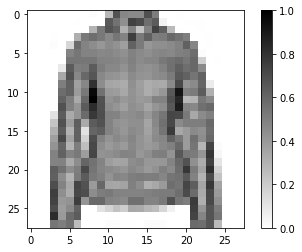

In [12]:
for image,label in test_dataset.take(1):
    break
image=image.numpy().reshape((28,28))

plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

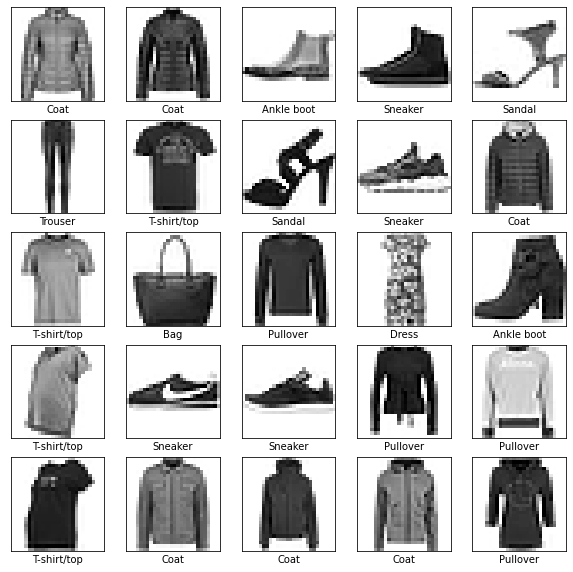

In [15]:
plt.figure(figsize=(10,10))
i=0
for (image,label) in test_dataset.take(25):
    image=image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image,cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i+=1
plt.show()

In [17]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28,28,1)),
                           tf.keras.layers.MaxPooling2D((2,2),strides=2),
                           tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu),
                           tf.keras.layers.MaxPooling2D((2,2),strides=2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(128,activation=tf.nn.relu),
                           tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                           ])

In [18]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])


In [19]:
BATCH_SIZE=32
train_dataset=train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.cache().batch(BATCH_SIZE)

In [20]:
model.fit(train_dataset,epochs=10,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 52s 25ms/step - loss: 0.3960 - accuracy: 0.8582
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2652 - accuracy: 0.9036
Epoch 3/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2182 - accuracy: 0.9201
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1830 - accuracy: 0.9323
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1596 - accuracy: 0.9411
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1327 - accuracy: 0.9514
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1135 - accuracy: 0.9579
Epoch 8/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0966 - accuracy: 0.9638
Epoch 9/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0791 - accuracy: 0.9705
Epoch 10/10
1875/1875 [==============================] - 47s 25m

In [21]:
test_loss,test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print ('Accuracy on test data : {}'.format(test_accuracy))

313/313 [==============================] - 4s 12ms/step - loss: 0.3261 - accuracy: 0.9180
Accuracy on test data : 0.9179999828338623


In [23]:
for test_images,test_labels in test_dataset.take(1):
    test_images=test_images.numpy()
    test_labels=test_labels.numpy()
    predictions=model.predict(test_images)

In [25]:
predictions.shape

(32, 10)

In [26]:
predictions[0]

array([1.8449163e-07, 5.8286528e-08, 9.5961565e-05, 1.6813331e-09,
       9.6517396e-01, 1.0427589e-10, 3.4729507e-02, 6.7084470e-11,
       1.7955449e-07, 9.1493826e-09], dtype=float32)

In [27]:
np.argmax(predictions[0])

4

In [28]:
test_labels[0]

4

In [35]:
def plot_image(i,predictions_array,true_labels,images):
    predictions_array,true_label,img=predictions_array[i],true_labels[i],images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0],cmap=plt.cm.binary)

    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label],color=color))

def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


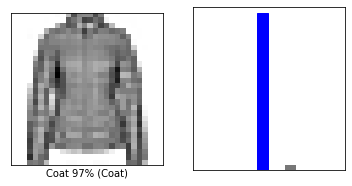

In [37]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)

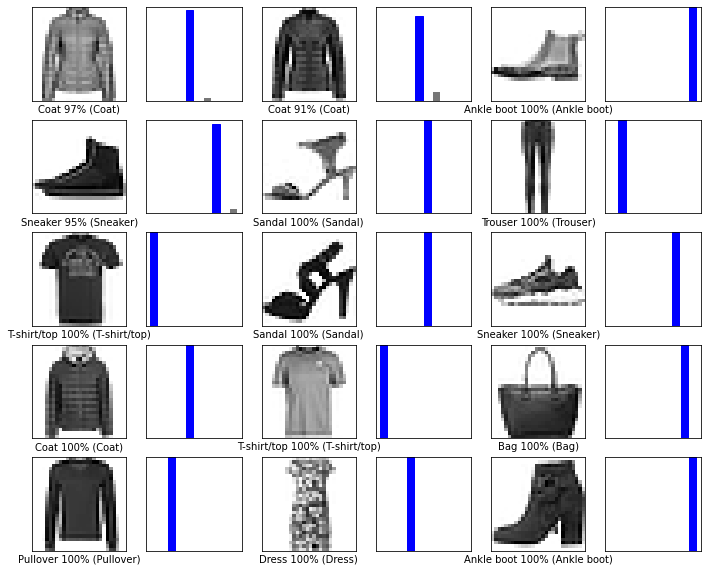

In [38]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [39]:
img=test_images[0]
print(img.shape)

(28, 28, 1)


In [40]:
print("Hello World")

Hello World
